In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import datetime as dt

warnings.filterwarnings("ignore")


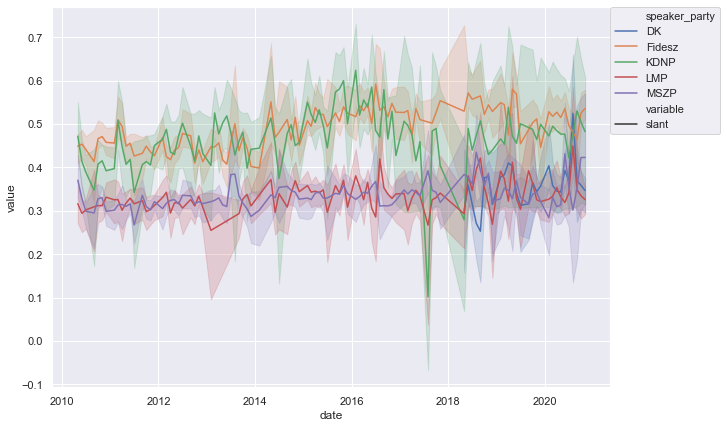

In [49]:
z_score = 1.96
alpha = 0.1
df = (
    pd.read_csv("../data/output/party_slant_pred.csv")
    .assign(
        date=lambda x: pd.to_datetime(x["ym"], format="%Y-%m"),
        se=lambda x: x["se"].fillna(x["se"].mean()),
        se_cut=lambda x: np.where(x["se"] > 0.1, 0.1, x["se"]),
        ci_lower=lambda x: x["slant"] - z_score * x["se_cut"],
        ci_upper=lambda x: x["slant"] + z_score * x["se_cut"],
        slant=lambda x: x.groupby("speaker_party")["slant"]
        .ewm(alpha=alpha)
        .mean()
        .values,
    )
    .melt(
        id_vars=["speaker_party", "date"],
        value_vars=["slant", "ci_lower", "ci_upper"],
    )
    .assign(
        variable=lambda x: np.where(lambda x: x["variable"] == "slant", "slant", "ci")
    )
    .loc[lambda x: x["speaker_party"].isin(["DK", "Fidesz", "KDNP", "LMP", "MSZP"])]
)

plt.figure(figsize=(10, 7))
sns.set_theme(style="darkgrid")
sns.lineplot(x="date", y="value", hue="speaker_party", style="variable", data=df)
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.0)

(0.2, 0.65)

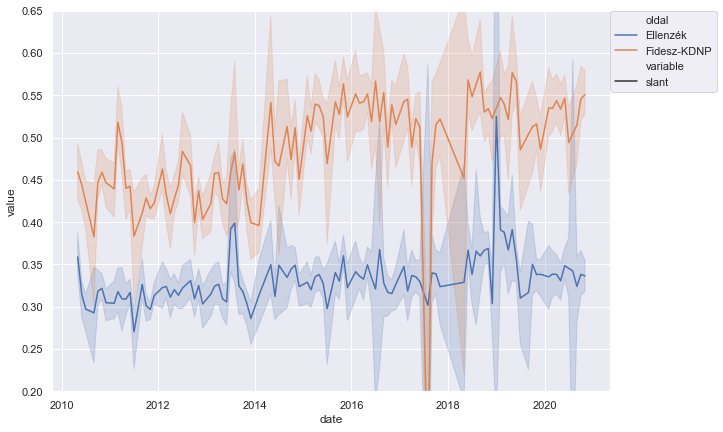

In [58]:
z_score = 1.96
alpha = 0.5
df = (
    pd.read_csv("../data/output/site_slant_pred.csv")
    .assign(
        date=lambda x: pd.to_datetime(x["ym"], format="%Y-%m"),
        se=lambda x: x["se"].fillna(x["se"].mean()),
        ci_lower=lambda x: x["slant"] - z_score * x["se"],
        ci_upper=lambda x: x["slant"] + z_score * x["se"],
        slant=lambda x: x.groupby("oldal")["slant"].ewm(alpha=alpha).mean().values,
    )
    .melt(
        id_vars=["oldal", "date"],
        value_vars=["slant", "ci_lower", "ci_upper"],
    )
    .assign(
        variable=lambda x: np.where(lambda x: x["variable"] == "slant", "slant", "ci")
    )
)

plt.figure(figsize=(10, 7))
sns.set_theme(style="darkgrid")
sns.lineplot(x="date", y="value", hue="oldal", style="variable", data=df)
plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.0)
plt.ylim([0.2, 0.65])